In [75]:
##Importar las librerias

import numpy as np
import pandas as pd ##paneles de datos

import datetime
import matplotlib.pyplot as plt ##para hacer graficas

from pandas.plotting import scatter_matrix ##grafica iteractiva


In [76]:
import yfinance as yf ##Descargas yf finance

In [77]:
!pip install yfinance ##el ! es para instalar dentro de las celdas

##Vamos a comparar estadisticamente una lista de tickers

In [78]:
#Vamos a descargar cinco tickers y vamos a indicar las fechas en las que queremos la información

fecha_inicial ="2021-12-31"
fecha_final="2023-10-05"

In [79]:
femsa= yf.download("FEMSAUBD.MX", fecha_inicial,fecha_final)
herdez= yf.download("HERDEZ.MX", fecha_inicial,fecha_final)
cuervo= yf.download("CUERVO.MX", fecha_inicial,fecha_final)
ac= yf.download("AC.MX", fecha_inicial,fecha_final)
alsea= yf.download("ALSEA.MX", fecha_inicial,fecha_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [80]:
tickers=["FEMSAUBD.MX","HERDEZ.MX","CUERVO.MX","AC.MX","ALSEA.MX"] ##Jalas los datos de estos tickers, manera facil

datos= yfinance.download(tickers,fecha_inicial,fecha_final)["Close"] ##Bajas los datos e indicas que solo te muestre la columna de los closes
datos

[*********************100%%**********************]  5 of 5 completed


,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,130.520004,37.950001,51.360001,159.320007,40.480000
2022-01-03,128.520004,39.939999,51.270000,159.110001,39.990002
2022-01-04,130.869995,41.029999,51.139999,161.389999,39.869999
2022-01-05,129.750000,41.900002,50.810001,162.210007,39.700001
2022-01-06,128.740005,41.779999,50.560001,161.800003,39.990002
...,...,...,...,...,...
2023-09-28,158.050003,63.419998,42.560001,189.089996,41.830002
2023-09-29,158.770004,63.599998,41.619999,189.979996,40.619999
2023-10-02,160.149994,62.990002,41.590000,195.759995,40.610001


In [81]:
datos.describe() ##Sacas un data frame con los datos estadisticos

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
count,445.000000,445.000000,445.000000,445.000000,445.000000
mean,150.660922,45.469933,44.517865,159.139775,38.071775
std,17.694222,7.981005,3.470671,20.808200,6.963327
min,118.010002,34.930000,35.450001,121.089996,24.820000
25%,133.050003,38.810001,42.240002,144.570007,31.559999
50%,155.410004,43.270000,44.480000,159.320007,39.500000
75%,164.139999,49.939999,46.520000,173.570007,44.730000
max,181.089996,66.000000,53.400002,199.669998,49.230000


In [82]:
varianza= datos.std()**2 ##Elevas al cuadrado la desviacion estandar de cada ticker para sacar la varianza de los precios
varianza

AC.MX          313.085508
ALSEA.MX        63.696433
CUERVO.MX       12.045557
FEMSAUBD.MX    432.981202
HERDEZ.MX       48.487926
dtype: float64

In [83]:
varianza=datos.var() ##Otra forma para sacar la varianza
varianza

AC.MX          313.085508
ALSEA.MX        63.696433
CUERVO.MX       12.045557
FEMSAUBD.MX    432.981202
HERDEZ.MX       48.487926
dtype: float64

In [84]:
rendimientos= datos.pct_change() ##Funcion para sacar los rendimientos de los datos
rendimientos

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.015323,0.052437,-0.001752,-0.001318,-0.012105
2022-01-04,0.018285,0.027291,-0.002536,0.014330,-0.003001
2022-01-05,-0.008558,0.021204,-0.006453,0.005081,-0.004264
2022-01-06,-0.007784,-0.002864,-0.004920,-0.002528,0.007305
...,...,...,...,...,...
2023-09-28,0.004832,0.001263,-0.016181,-0.001531,0.005529
2023-09-29,0.004556,0.002838,-0.022087,0.004707,-0.028927
2023-10-02,0.008692,-0.009591,-0.000721,0.030424,-0.000246


In [85]:
var=rendimientos.var()*100
var

AC.MX          0.021079
ALSEA.MX       0.035221
CUERVO.MX      0.024660
FEMSAUBD.MX    0.020692
HERDEZ.MX      0.048892
dtype: float64

In [86]:
rendimientos.mean()

AC.MX          0.000537
ALSEA.MX       0.001361
CUERVO.MX     -0.000376
FEMSAUBD.MX    0.000562
HERDEZ.MX      0.000182
dtype: float64

In [87]:
rendimientos.describe()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
count,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.000537,0.001361,-0.000376,0.000562,0.000182
std,0.014519,0.018767,0.015703,0.014385,0.022112
min,-0.048598,-0.071988,-0.056592,-0.070087,-0.063233
25%,-0.008347,-0.010033,-0.010216,-0.008396,-0.012550
50%,0.000502,0.001660,-0.000275,0.000434,-0.000502
75%,0.008380,0.011904,0.008956,0.008580,0.013467
max,0.070801,0.088256,0.055485,0.088805,0.084856


In [88]:
covarianza= rendimientos.cov() ##Calculas la matriz de covarianza
covarianza

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
AC.MX,0.000211,0.000005,0.000036,0.000049,0.000018
ALSEA.MX,0.000005,0.000352,0.000034,0.000055,0.000098
CUERVO.MX,0.000036,0.000034,0.000247,0.000043,0.000062
FEMSAUBD.MX,0.000049,0.000055,0.000043,0.000207,0.000057
HERDEZ.MX,0.000018,0.000098,0.000062,0.000057,0.000489


In [89]:
herdez["Rendimientos"] = (herdez["Close"]/herdez["Close"].shift(1))-1 ##Para sacar los rendimientos esperados de herdez
herdez=herdez[["Close","Rendimientos"]].dropna() ##Fijas las columnas que quieres y quitas la de Na con drop
herdez

,Close,Rendimientos
Date,,
2022-01-03,39.990002,-0.012105
2022-01-04,39.869999,-0.003001
2022-01-05,39.700001,-0.004264
2022-01-06,39.990002,0.007305
2022-01-07,39.320000,-0.016754
...,...,...
2023-09-28,41.830002,0.005529
2023-09-29,40.619999,-0.028927
2023-10-02,40.610001,-0.000246


<Axes: >

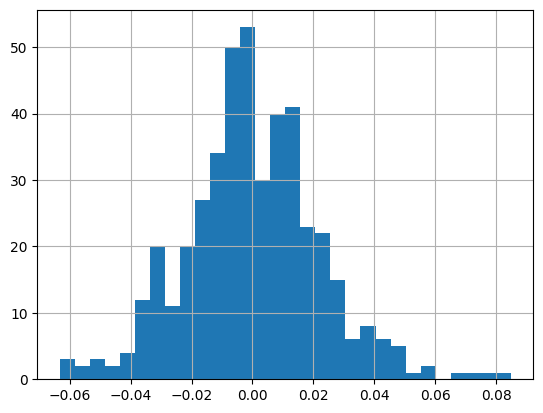

In [90]:
herdez["Rendimientos"].hist(bins=30) ##Generar un hustograma y en los bins se pone en cuanto despedasaras la grafica abajo en horizontal